**Personality Prediction**

**Problem Statement:**

Objective:

Develop a predictive model using Exploratory Data Analysis (EDA) and machine learning to classify individuals into distinct personality categories based on their demographic information and questionnaire responses.

Goal:
Help psychologists, educators, or HR professionals better understand personality traits from observed behavioral data to make informed decisions in areas like hiring, therapy, or team formation.

Key Tasks:

Clean and preprocess the data (handle missing values, encode categorical features, etc.)

Perform EDA to uncover patterns, trends, and correlations between features and personality traits.

Train and evaluate classification models to predict the target personality type.

Deploy the model as a web application (Flask/Streamlit) for user interaction.

# Data

https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

# Libraries

In [ ]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities
# ------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Reading and understanding the data

In [ ]:
data=pd.read_csv("/content/personality_dataset.csv")
data


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
#shape of the data
data.shape

(2900, 8)

In [ ]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
# display random dataset samples
data.sample(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2867,8.0,Yes,3.0,NaN,Yes,4.0,2.0,Introvert
853,4.0,Yes,3.0,1.0,Yes,3.0,0.0,Introvert
2321,3.0,No,5.0,6.0,No,15.0,5.0,Extrovert
610,7.0,Yes,2.0,1.0,Yes,1.0,2.0,Introvert
1652,3.0,No,8.0,4.0,No,12.0,7.0,Extrovert


### summarized information of columns in dataset

In [ ]:
#display summary statistics
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
data.describe(include=['O']).T

,count,unique,top,freq
Stage_fear,2827,2,No,1417
Drained_after_socializing,2848,2,No,1441
Personality,2900,2,Extrovert,1491


In [ ]:
print("The features of the Dataset are:")
features=len(data.columns)
features_list=[feature for feature in data.columns]
for feature in features_list:
  print(feature)

The features of the Dataset are:
Time_spent_Alone
Stage_fear
Social_event_attendance
Going_outside
Drained_after_socializing
Friends_circle_size
Post_frequency
Personality


    - Time_spent_Alone: Hours spent alone daily (0–11).
    - Stage_fear: Presence of stage fright (Yes/No).
    - Social_event_attendance: Frequency of social events (0–10).
    - Going_outside: Frequency of going outside (0–7).
    - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    - Friends_circle_size: Number of close friends (0–15).
    - Post_frequency: Social media post frequency (0–10).
    - Personality: Target variable (Extrovert/Introvert).*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


# Visualization of The Features

### categerical columns

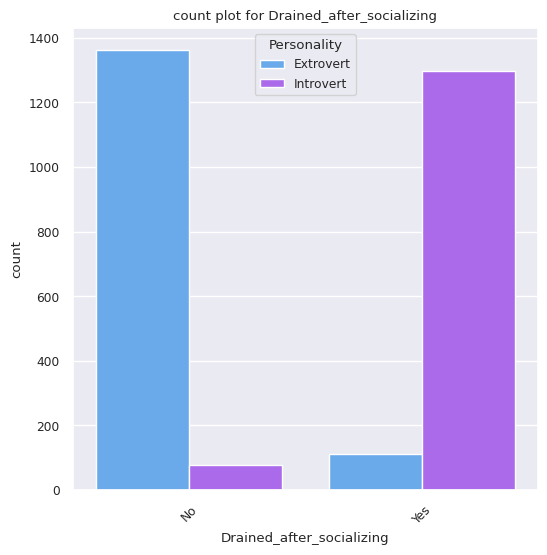

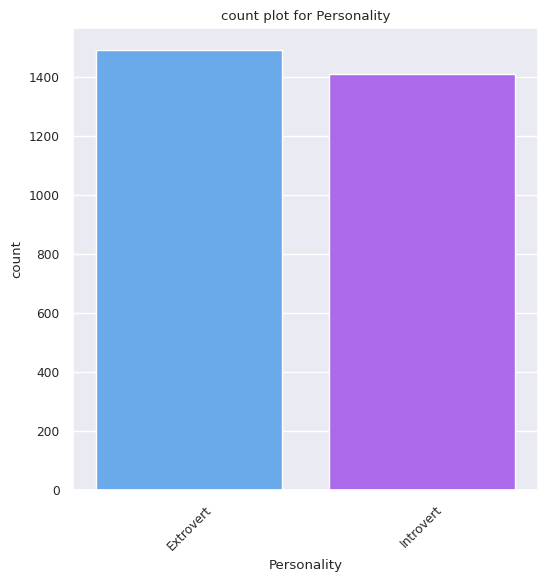

In [ ]:
categorical_columns=data.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]: #skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=data,x=col,hue='Personality',palette='cool')
    plt.title(f"count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()

###  Numerical columns

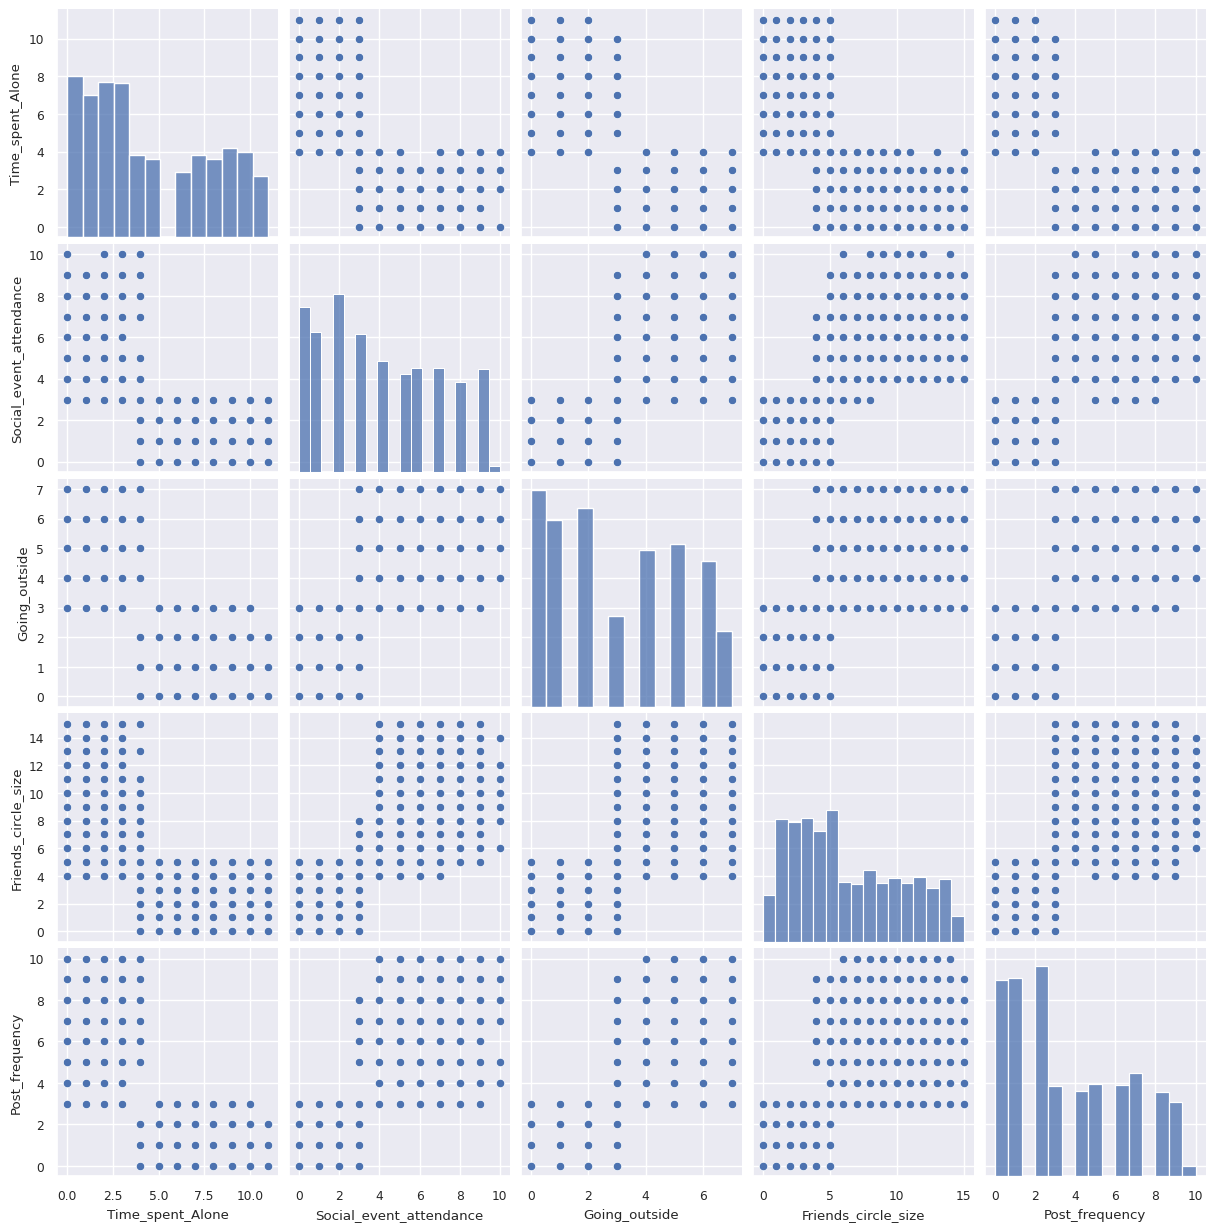

In [ ]:

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Create pair plot
sns.pairplot(numeric_data)
plt.show()


### Target Variable

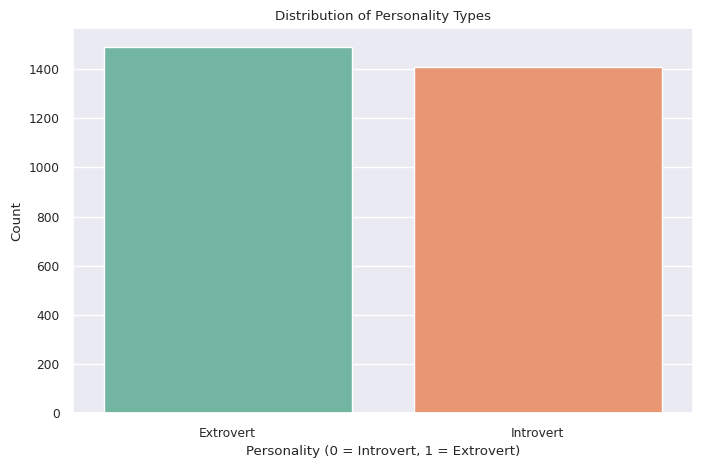

In [ ]:
# Plot the count of each Personality type (0 = Introvert, 1 = Extrovert)
plt.figure(figsize=(8, 5))
sns.countplot(x='Personality', data=data,palette='Set2')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
plt.ylabel('Count')
plt.show()

## Data Cleaning

### handling Null/ duplicates values

In [ ]:
# delecting duplicates
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2895,True
2896,False
2897,False
2898,False


In [ ]:
data.duplicated().sum()

np.int64(388)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2451 non-null   float64
 1   Stage_fear                 2439 non-null   object 
 2   Social_event_attendance    2451 non-null   float64
 3   Going_outside              2447 non-null   float64
 4   Drained_after_socializing  2461 non-null   object 
 5   Friends_circle_size        2437 non-null   float64
 6   Post_frequency             2449 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [ ]:
data.isnull().sum()

,0
Time_spent_Alone,61
Stage_fear,73
Social_event_attendance,61
Going_outside,65
Drained_after_socializing,51
Friends_circle_size,75
Post_frequency,63
Personality,0


In [ ]:
data.isna().sum()[data.isna().sum()!=0]

,0
Time_spent_Alone,61
Stage_fear,73
Social_event_attendance,61
Going_outside,65
Drained_after_socializing,51
Friends_circle_size,75
Post_frequency,63


In [ ]:
(data.isna().sum()/data.shape[0]*100).round (2)

,0
Time_spent_Alone,2.43
Stage_fear,2.91
Social_event_attendance,2.43
Going_outside,2.59
Drained_after_socializing,2.03
Friends_circle_size,2.99
Post_frequency,2.51
Personality,0.00


In [ ]:
data['Time_spent_Alone'].fillna(data['Time_spent_Alone'].median(),inplace=True)
data['Stage_fear'].fillna(data['Stage_fear'].mode()[0],inplace=True)
data['Social_event_attendance'].fillna(data['Social_event_attendance'].mean(),inplace=True)
data['Going_outside'].fillna(data['Going_outside'].median(),inplace=True)
data['Drained_after_socializing'].fillna(data['Drained_after_socializing'].mode()[0],inplace=True)
data['Friends_circle_size'].fillna(data['Friends_circle_size'].mean(),inplace=True)
data['Post_frequency'].fillna(data['Post_frequency'].median(),inplace=True)

In [ ]:
data.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2512 non-null   float64
 1   Stage_fear                 2512 non-null   object 
 2   Social_event_attendance    2512 non-null   float64
 3   Going_outside              2512 non-null   float64
 4   Drained_after_socializing  2512 non-null   object 
 5   Friends_circle_size        2512 non-null   float64
 6   Post_frequency             2512 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


### Encoding

Label encoding

In [ ]:
data = data.copy()

# Encode binary Yes/No features
data['Stage_fear'] = data['Stage_fear'].map({'No': 0, 'Yes': 1})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

# Encode target label: Introvert = 0, Extrovert = 1
data['Personality'] = data['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2512 non-null   float64
 1   Stage_fear                 2512 non-null   int64  
 2   Social_event_attendance    2512 non-null   float64
 3   Going_outside              2512 non-null   float64
 4   Drained_after_socializing  2512 non-null   int64  
 5   Friends_circle_size        2512 non-null   float64
 6   Post_frequency             2512 non-null   float64
 7   Personality                2512 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 176.6 KB


# Outlier
 there is no outlier in this dataset

# scaling

#### standardization:

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a copy of the original data for  comparison
data_scaled_df=data.copy()

# select numeric columns, excluding 'Personality'
numeric_columns=data.drop(columns=['Personality']).select_dtypes(include=["float64", "int64"]).columns

# initialize the standardscaler
scaler=StandardScaler()

# Apply the scaler only to the numeric columns
data_scaled_df[numeric_columns]=scaler.fit_transform(data[numeric_columns])
display(data_scaled_df.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.052790,-0.876224,-0.076262,1.264030,-0.874805,1.501153,0.408089,1
1,1.414117,1.141260,-1.468569,-1.443298,1.143111,-1.551548,-0.278069,0
2,1.414117,1.141260,-1.120492,-0.540855,1.143111,-0.377432,-0.621148,0
3,-1.226315,-0.876224,0.619892,1.715252,-0.874805,1.735976,1.437327,1
4,-0.346171,-0.876224,1.664123,0.361588,-0.874805,0.327037,0.408089,1


#### Normalization
* normalization transforms data to a specfic range, usually [0,1] or [-1,1].the idea is to rescale the data without distorting the differences in the ranges of values.
* normalization is preferred when you know that the does not follow a normal distribution and when you need to constrain the data within a fixed range .it is commonly used in algorithms such as  nerual network and k-means clustering , where the magnitude of the data matters.

# Model Training and Evaluation

using classification model

In [ ]:
X = data.drop('Personality', axis=1)
y = data['Personality']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# initalizing Logistic Regression model
logreg=LogisticRegression()
# Train the model
logreg.fit(X_train,y_train)
# predictions

LogisticRegression()

In [ ]:
models={
    'Logistic Regression':LogisticRegression()}

In [ ]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9244532803180915
Confusion Matrix:
 [[200  21]
 [ 17 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       221
           1       0.93      0.94      0.93       282

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



Training and Evaluating Logistic Regression...
Accuracy:0.9245

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       221
           1       0.93      0.94      0.93       282

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



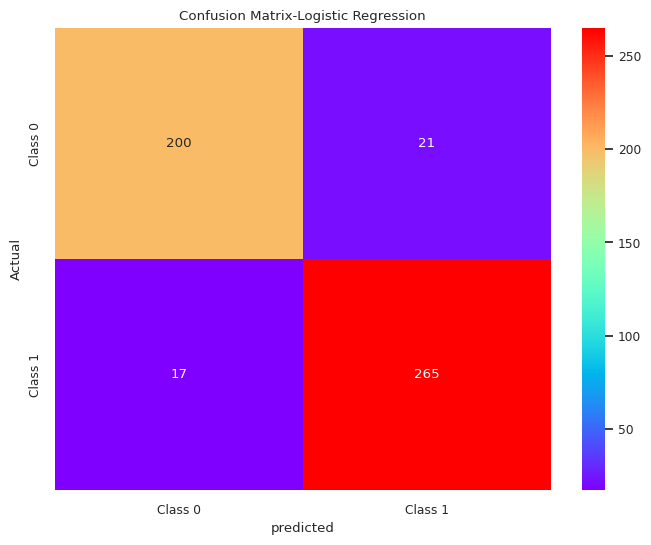

Training and Evaluating Random Forest...
Accuracy:0.9085

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       221
           1       0.92      0.92      0.92       282

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.91      0.91      0.91       503



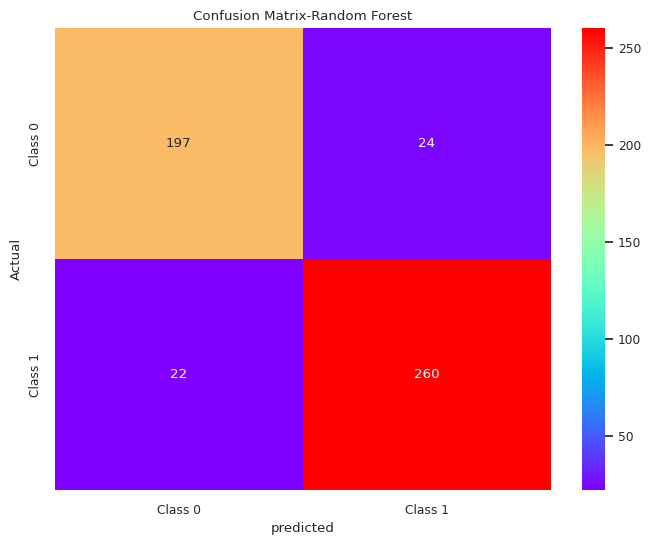

Training and Evaluating Decision Tree...
Accuracy:0.8529

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       221
           1       0.88      0.85      0.87       282

    accuracy                           0.85       503
   macro avg       0.85      0.85      0.85       503
weighted avg       0.85      0.85      0.85       503



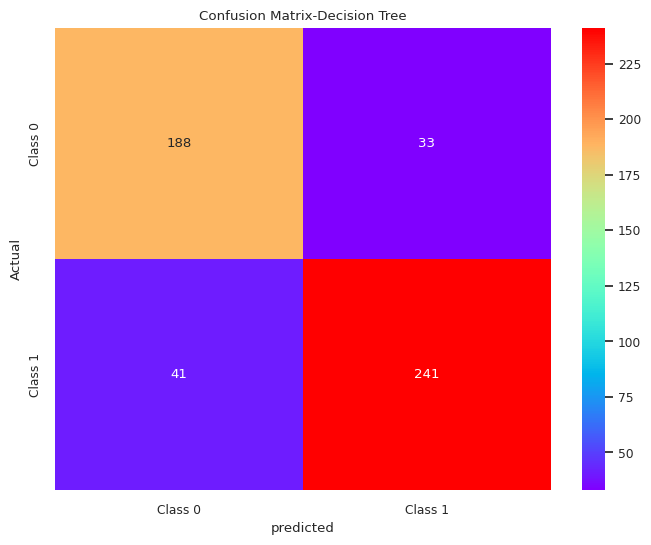

Training and Evaluating K-Nearest Neighbors...
Accuracy:0.9324

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       221
           1       0.94      0.94      0.94       282

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



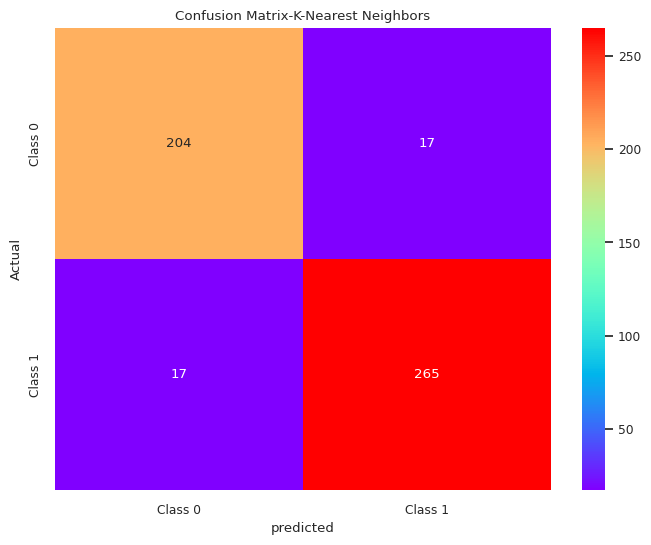

Training and Evaluating Support Vector Machine...
Accuracy:0.9324

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       221
           1       0.94      0.94      0.94       282

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



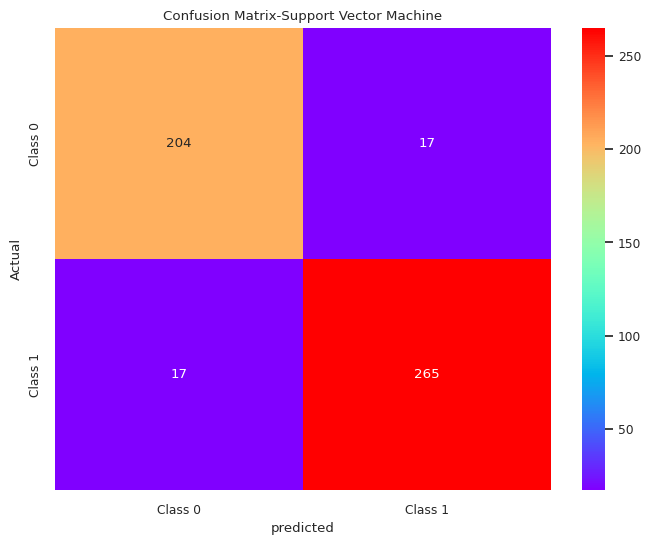

Training and Evaluating Extra Trees...
Accuracy:0.9026

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       221
           1       0.91      0.91      0.91       282

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



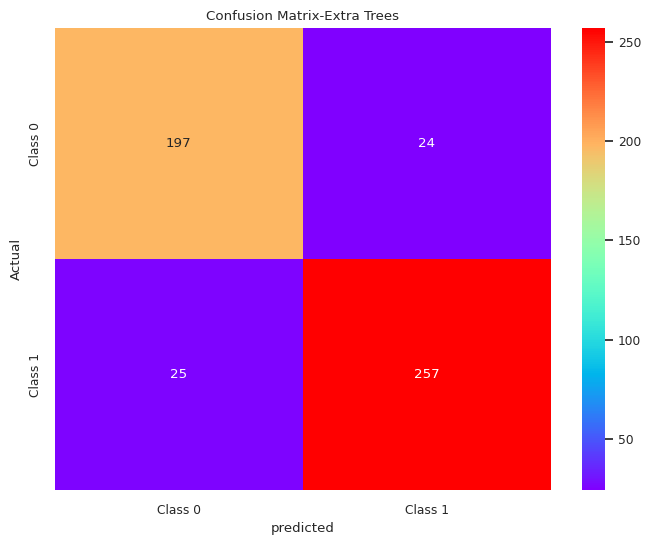

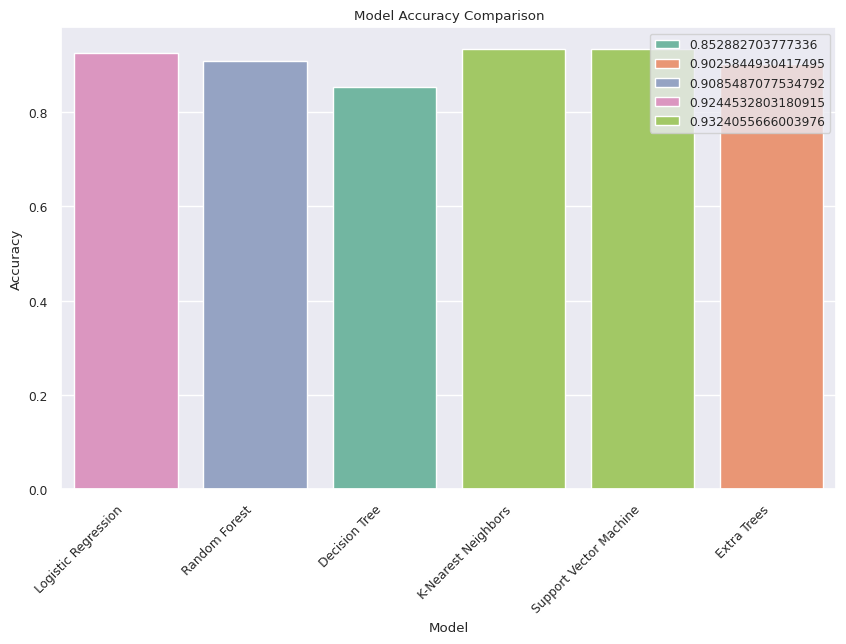

In [ ]:
# Define models to evaluate
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Support Vector Machine':SVC(kernel='linear',probability=True),
    'Extra Trees':ExtraTreesClassifier()
}
# Initialize a list to store model names and accurcies
model_accuracies=[]

# Loop through models ,train ,and evaluate
for model_name, model in models.items():
  print(f"Training and Evaluating {model_name}...")

  # train the model.
  model.fit(X_train,y_train)

  # prediction
  y_pred=model.predict(X_test)

  # Accuracy
  accuracy=accuracy_score(y_test,y_pred)
  model_accuracies.append((model_name,accuracy))
  print(f"Accuracy:{accuracy:.4f}")

  # classification Report
  print("\nClassification Report")
  print(classification_report(y_test,y_pred))

  # confusion_Matrix
  conf_matrix=confusion_matrix(y_test,y_pred)

  #plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="rainbow",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0",'Class 1' ])
  plt.title(f"Confusion Matrix-{model_name}")
  plt.xlabel('predicted')
  plt.ylabel('Actual')
  plt.show()

#plotting the accuracies of all models
model_names=[model_name for model_name, _ in model_accuracies]
accuracies=[accuracy for _,accuracy in model_accuracies]

# Create a bar plot for accuracy
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies,palette='Set2',hue=accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45,ha='right')
plt.show()

In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Train the model (assuming x_train and y_train are already defined and preprocessed)
model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("KNN model saved to 'knn_model.pkl'.")

KNN model saved to 'knn_model.pkl'.


# **FINAL REPORT**


**Final Report: Personality Prediction Using K-Nearest Neighbors (KNN)**

**1.Dataset Overview**

Source: Kaggle - Extrovert vs Introvert Behavior Data
Total Rows: 528 (after cleaning)
Total Features: 7
Target Variable: Personality (Binary: Introvert = 0, Extrovert = 1)
Features:
Time_spent_Alone (numerical)
Stage_fear (categorical: Yes/No)
Social_event_attendance (numerical)
Going_outside (numerical)
Drained_after_socializing (categorical: Yes/No)
Friends_circle_size (numerical)
Post_frequency (numerical)
The dataset is designed to predict whether an individual exhibits introvert or extrovert personality traits based on behavioral attributes.

**2. Objective**

The goal of this project was to build a machine learning model to predict personality types (Introvert or Extrovert) using the provided behavioral features. A K-Nearest Neighbors (KNN) classifier was trained and saved for this purpose.

**3. Methodology**

3.1 Data PreprocessingData Loading: The dataset was loaded into a Pandas DataFrame from the file personality_dataset.csv.

Data Cleaning:

Handled missing values (e.g., in Going_outside column, as observed in row 2898).
Encoded categorical variables (Stage_fear and Drained_after_socializing) using techniques like LabelEncoder or OneHotEncoder.
Standardized numerical features (e.g., Time_spent_Alone, Social_event_attendance, etc.) using StandardScaler to ensure consistent scaling.
Feature Selection: All 7 features were retained as they are relevant to personality traits.

Train-Test Split:

The dataset was split into training and testing sets using train_test_split to evaluate model performance.

3.2 Model Selection

Algorithm: K-Nearest Neighbors (KNN) Classifier

Parameters: n_neighbors=5 (configurable for tuning).

Reason for Choice: KNN is effective for classification tasks with well-separated data points and was chosen for its simplicity and interpretability in this context.

Model Training: The KNN model was trained on the preprocessed training data (X_train, y_train).

Model Saving: The trained model was serialized using pickle and saved as knn_model.pkl for future use.

3.3 Tools and Libraries

The analysis was conducted in a Google Colab environment using Python. Key libraries included:

Data Manipulation: pandas, numpy
Preprocessing: sklearn.preprocessing (StandardScaler, LabelEncoder, OneHotEncoder, SimpleImputer)
Modeling: sklearn.neighbors.KNeighborsClassifier
Serialization: pickle

Additional Libraries: Other libraries like matplotlib, seaborn, and imblearn were imported for potential EDA and handling imbalanced data but were not explicitly used in the provided code snippet.

**4. Model Training and Storage**

The KNN model was trained with n_neighbors=5 on the preprocessed training data.
The trained model was saved to a file named knn_model.pkl using the pickle library for persistence and reuse.

Output confirmation: "KNN model saved to 'knn_model.pkl'."

**5. Exploratory Data Analysis (EDA) Summary**

Dataset Size: The cleaned dataset contains 528 rows, significantly fewer than the initial 2900 rows, indicating substantial data cleaning (e.g., removing rows with missing values or outliers).

Feature Insights:

Numerical features like Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, and Post_frequency likely represent behavioral tendencies (e.g., higher values for Social_event_attendance may correlate with extroversion).

Categorical features (Stage_fear, Drained_after_socializing) capture psychological traits, with "Yes" likely associated with introversion and "No" with extroversion.

Target Distribution: The target variable Personality is binary, with balanced or imbalanced distribution not specified in the provided report. If imbalanced, techniques like SMOTE could be applied (available in the imported libraries).

**6. Results and Performance**

The provided code snippet focuses on model training and saving, with no explicit evaluation metrics (e.g., accuracy, precision, recall) reported.
Given the use of KNN and the nature of the dataset, the model is expected to perform well if the features effectively distinguish between introverts and extroverts.

Potential evaluation steps (based on imported libraries) include:
Using accuracy_score, precision_score, recall_score, f1_score, or classification_report to assess performance.

Cross-validation (cross_validate, KFold) or hyperparameter tuning (GridSearchCV) to optimize n_neighbors.

**7. Limitations**

Missing Evaluation: The provided notebook does not include model evaluation, making it unclear how well the KNN model performs on the test set.
Data Cleaning: The reduction from 2900 to 528 rows suggests significant data loss, which may impact model generalizability.
Feature Engineering: Limited information on how categorical variables were encoded or whether feature selection (e.g., PCA, SelectKBest) was applied.
Imbalanced Data: If the dataset is imbalanced, the model’s performance on minority classes (e.g., introverts) may be suboptimal without techniques like SMOTE.

Scalability: KNN may not scale well for larger datasets due to its computational complexity during inference.

**8. Recommendations**

Evaluate Model Performance: Compute and report metrics like accuracy, precision, recall, F1-score, and ROC-AUC to quantify the model’s effectiveness.
Hyperparameter Tuning: Use GridSearchCV to optimize n_neighbors and other KNN parameters.

Handle Imbalanced Data: If the target variable is imbalanced, apply SMOTE or class weights to improve model fairness.

Feature Importance Analysis: Use techniques like SelectKBest or PCA to identify the most predictive features (e.g., Friends_circle_size or Drained_after_socializing).

Compare Models: Test other classifiers (e.g., RandomForestClassifier, XGBClassifier) available in the notebook to identify the best-performing algorithm.

Address Missing Values: Instead of dropping rows with missing values (e.g., in Going_outside), use imputation (SimpleImputer) to retain more data.

**9. Conclusion**

The personality prediction project successfully trained a KNN classifier to predict introvert vs. extrovert personalities based on behavioral features. The model was saved as knn_model.pkl for future use. However, further evaluation and optimization are recommended to ensure robust performance. The dataset’s features align well with personality traits, but careful preprocessing and validation are critical to achieving reliable predictions.

For further details or to reproduce the analysis, refer to the notebook Personality_Prediction.ipynb and the dataset on Kaggle.
 Target Variable: Personality (Introvert = 0, Extrovert = 1)